In [1]:
import lightning as L
import torch
from shared_utilities_2 import PyTorchMLP, LightningModel, MNISTDataModule

In [2]:
from lightning.pytorch.loggers import CSVLogger ### New

In [5]:
torch.manual_seed(123)

dm = MNISTDataModule()

pytorch_model = PyTorchMLP(num_features=784, num_classes=10)

lightning_model = LightningModel(model=pytorch_model, learning_rate=0.05)

trainer = L.Trainer(
    max_epochs=5,
    accelerator="gpu",
    devices="auto",
    logger=CSVLogger(save_dir="logs/", name="my-model"), ### NEW
    deterministic=True,
)

trainer.fit(model=lightning_model, datamodule=dm)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type               | Params
-------------------------------------------------
0 | model     | PyTorchMLP         | 40.8 K
1 | train_acc | MulticlassAccuracy | 0     
2 | val_acc   | MulticlassAccuracy | 0     
3 | test_acc  | MulticlassAccuracy | 0     
-------------------------------------------------
40.8 K    Trainable params
0         Non-trainable params
40.8 K    Total params
0.163     Total estimated model params size (MB)


Epoch 4: 100%|██████████| 859/859 [00:21<00:00, 39.78it/s, v_num=1, val_acc=0.949, train_acc=0.954]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 859/859 [00:21<00:00, 39.76it/s, v_num=1, val_acc=0.949, train_acc=0.954]


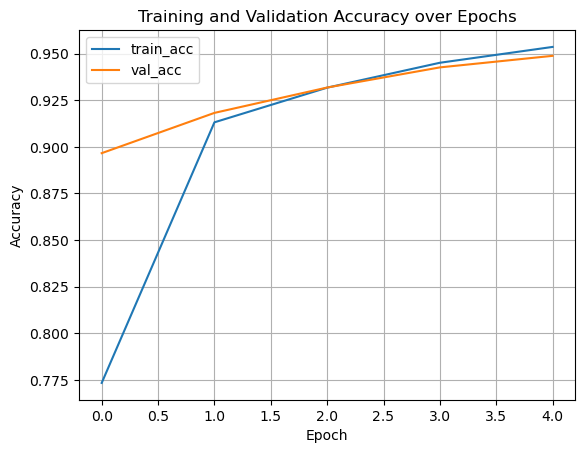

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


metrics = pd.read_csv(f"{trainer.logger.log_dir}/metrics.csv")

aggreg_metrics = []
agg_col = "epoch"
for i, dfg in metrics.groupby(agg_col):
    agg = dict(dfg.mean())  # Take the mean of non-NA/null entries.
    agg[agg_col] = i
    aggreg_metrics.append(agg)

df_metrics = pd.DataFrame(aggreg_metrics)

# Plotting accuracy metrics
df_metrics.plot(
    x='epoch',
    y=['train_acc', 'val_acc'],
    grid=True, legend=True, xlabel="Epoch", ylabel="Accuracy",
    title="Training and Validation Accuracy over Epochs"
)

plt.show()